In [47]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv('dataset/1724929644/dataset-90d.csv')
df.head()

,machine,time,axialAxisRmsVibration,radialAxisKurtosis,radialAxisPeakAcceleration,radialAxisRmsAcceleration,radialAxisRmsVibration,temperature
0,Blower-Pump-1,2024-05-30T13:41:00Z,0.763,3.470,0.801,0.166,1.435,54.3
1,Blower-Pump-1,2024-05-30T13:42:00Z,0.821,3.526,0.737,0.166,1.305,54.2
2,Blower-Pump-1,2024-05-30T13:43:00Z,0.821,3.526,0.737,0.166,1.305,54.2
3,Blower-Pump-1,2024-05-30T13:44:00Z,0.821,3.526,0.737,0.166,1.305,54.2
4,Blower-Pump-1,2024-05-30T13:45:00Z,0.821,3.526,0.737,0.166,1.305,54.2


In [49]:
df.shape

(129181, 8)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129181 entries, 0 to 129180
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   machine                     129181 non-null  object 
 1   time                        129181 non-null  object 
 2   axialAxisRmsVibration       129181 non-null  float64
 3   radialAxisKurtosis          129181 non-null  float64
 4   radialAxisPeakAcceleration  129181 non-null  float64
 5   radialAxisRmsAcceleration   129181 non-null  float64
 6   radialAxisRmsVibration      129181 non-null  float64
 7   temperature                 129181 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.9+ MB


In [51]:
df.index = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%SZ')

In [52]:
df.head()

,machine,time,axialAxisRmsVibration,radialAxisKurtosis,radialAxisPeakAcceleration,radialAxisRmsAcceleration,radialAxisRmsVibration,temperature
time,,,,,,,,
2024-05-30 13:41:00,Blower-Pump-1,2024-05-30T13:41:00Z,0.763,3.470,0.801,0.166,1.435,54.3
2024-05-30 13:42:00,Blower-Pump-1,2024-05-30T13:42:00Z,0.821,3.526,0.737,0.166,1.305,54.2
2024-05-30 13:43:00,Blower-Pump-1,2024-05-30T13:43:00Z,0.821,3.526,0.737,0.166,1.305,54.2
2024-05-30 13:44:00,Blower-Pump-1,2024-05-30T13:44:00Z,0.821,3.526,0.737,0.166,1.305,54.2
2024-05-30 13:45:00,Blower-Pump-1,2024-05-30T13:45:00Z,0.821,3.526,0.737,0.166,1.305,54.2


In [53]:
df.tail()

,machine,time,axialAxisRmsVibration,radialAxisKurtosis,radialAxisPeakAcceleration,radialAxisRmsAcceleration,radialAxisRmsVibration,temperature
time,,,,,,,,
2024-08-28 11:42:00,Blower-Pump-1,2024-08-28T11:42:00Z,0.824,3.196,0.629,0.162,1.081,54.0
2024-08-28 11:43:00,Blower-Pump-1,2024-08-28T11:43:00Z,0.824,3.225,0.720,0.164,1.275,54.0
2024-08-28 11:44:00,Blower-Pump-1,2024-08-28T11:44:00Z,0.824,3.225,0.720,0.164,1.275,54.0
2024-08-28 11:45:00,Blower-Pump-1,2024-08-28T11:45:00Z,0.824,3.225,0.720,0.164,1.275,54.0
2024-08-28 11:46:00,Blower-Pump-1,2024-08-28T11:46:00Z,0.824,3.225,0.720,0.164,1.275,54.0


In [54]:
df.drop(inplace=True, axis=1, columns=['time', 'machine'])


In [55]:
df.head()

,axialAxisRmsVibration,radialAxisKurtosis,radialAxisPeakAcceleration,radialAxisRmsAcceleration,radialAxisRmsVibration,temperature
time,,,,,,
2024-05-30 13:41:00,0.763,3.470,0.801,0.166,1.435,54.3
2024-05-30 13:42:00,0.821,3.526,0.737,0.166,1.305,54.2
2024-05-30 13:43:00,0.821,3.526,0.737,0.166,1.305,54.2
2024-05-30 13:44:00,0.821,3.526,0.737,0.166,1.305,54.2
2024-05-30 13:45:00,0.821,3.526,0.737,0.166,1.305,54.2


In [56]:
df_15m = df[4::15]
df_15m.head()

,axialAxisRmsVibration,radialAxisKurtosis,radialAxisPeakAcceleration,radialAxisRmsAcceleration,radialAxisRmsVibration,temperature
time,,,,,,
2024-05-30 13:45:00,0.821,3.526,0.737,0.166,1.305,54.2
2024-05-30 14:00:00,0.820,3.639,0.794,0.168,1.477,54.3
2024-05-30 14:15:00,0.788,3.447,0.874,0.162,1.189,54.2
2024-05-30 14:30:00,0.741,3.602,0.800,0.174,1.186,54.3
2024-05-30 14:45:00,0.783,3.430,0.827,0.164,1.193,54.3


In [57]:
df_15m.shape

(8612, 6)

In [58]:
def df_to_X_y(df:pd.DataFrame, target_index:int, window_size=720):
    df = df.to_numpy()
    X = []
    y = []

    for index in range(len(df) - window_size):
        X.append([window for window in df[index:index + window_size]])
        y.append(df[index + window_size][target_index])
    return np.array(X), np.array(y)

target_index = list(df_15m.columns).index('axialAxisRmsVibration')
X, y = df_to_X_y(df=df_15m, target_index=target_index)
X.shape, y.shape

((7892, 720, 6), (7892,))

In [59]:
X_train, y_train = X[:6172], y[:6172]
X_val, y_val = X[6172:6672], y[6172:6672]
X_test, y_test = X[6672:], y[6672:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6172, 720, 6), (6172,), (500, 720, 6), (500,), (1220, 720, 6), (1220,))

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [61]:
# Standardizasyon

feature_scaler = StandardScaler()

# Train verisi üzerinde fit ve transform
X_train_reshaped = X_train.reshape(-1, X_train.shape[2])  # 3D -> 2D (ör: [samples * timesteps, features])
X_train_scaled = feature_scaler.fit_transform(X_train_reshaped)
X_train_scaled = X_train_scaled.reshape(X_train.shape)   # 2D -> 3D geri dönüş

# Validation ve Test verileri üzerinde sadece transform
X_val_reshaped = X_val.reshape(-1, X_val.shape[2])
X_val_scaled = feature_scaler.transform(X_val_reshaped)
X_val_scaled = X_val_scaled.reshape(X_val.shape)

X_test_reshaped = X_test.reshape(-1, X_test.shape[2])
X_test_scaled = feature_scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

# Target değişkeni için scaler
target_scaler = StandardScaler()

# Train target üzerinde fit ve transform
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))

# Validation ve Test target üzerinde sadece transform
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))

In [62]:
X_train_scaled.shape, y_train_scaled.shape, X_test_scaled.shape, y_test_scaled.shape, X_val_scaled.shape, y_val_scaled.shape

((6172, 720, 6), (6172, 1), (1220, 720, 6), (1220, 1), (500, 720, 6), (500, 1))

In [63]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(720, 6)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()

c:\Users\yunus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 720, 100)       │        42,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 720, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,417 (286.79 KB)

 Trainable params: 73,417 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
cp = ModelCheckpoint('best_model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=5, batch_size=32, callbacks=[cp])

Epoch 1/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 161s 801ms/step - loss: 0.2816 - root_mean_squared_error: 0.5160 - val_loss: 0.2838 - val_root_mean_squared_error: 0.5327
Epoch 2/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 167s 868ms/step - loss: 0.1243 - root_mean_squared_error: 0.3518 - val_loss: 0.2769 - val_root_mean_squared_error: 0.5262
Epoch 3/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 148s 769ms/step - loss: 0.1278 - root_mean_squared_error: 0.3564 - val_loss: 0.2784 - val_root_mean_squared_error: 0.5276
Epoch 4/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 171s 886ms/step - loss: 0.0947 - root_mean_squared_error: 0.3060 - val_loss: 0.2878 - val_root_mean_squared_error: 0.5365
Epoch 5/5
193/193 ━━━━━━━━━━━━━━━━━━━━ 158s 818ms/step - loss: 0.1187 - root_mean_squared_error: 0.3437 - val_loss: 0.2896 - val_root_mean_squared_error: 0.5382


In [70]:
def plot_predictions(model, X, y, target_scaler, start=0, end=500):
    # Modelin tahminlerini al
    predictions_scaled = model.predict(X).flatten()
    predictions_original = target_scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

    # Gerçek değerleri orijinal ölçeğe dönüştür
    y_original = target_scaler.inverse_transform(y.reshape(-1, 1)).flatten()

    # Tahminler ve gerçek değerler için DataFrame oluştur
    df = pd.DataFrame(data={'Predictions': predictions_original, 'Actuals': y_original})

    # Plotlama
    plt.figure(figsize=(12, 6))
    plt.plot(df['Predictions'][start:end], label='Predictions', color='blue')
    plt.plot(df['Actuals'][start:end], label='Actuals', color='orange')
    plt.legend()
    plt.title('Predictions vs Actuals')
    plt.show()
    return df, mse(y_original, predictions_original)

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step


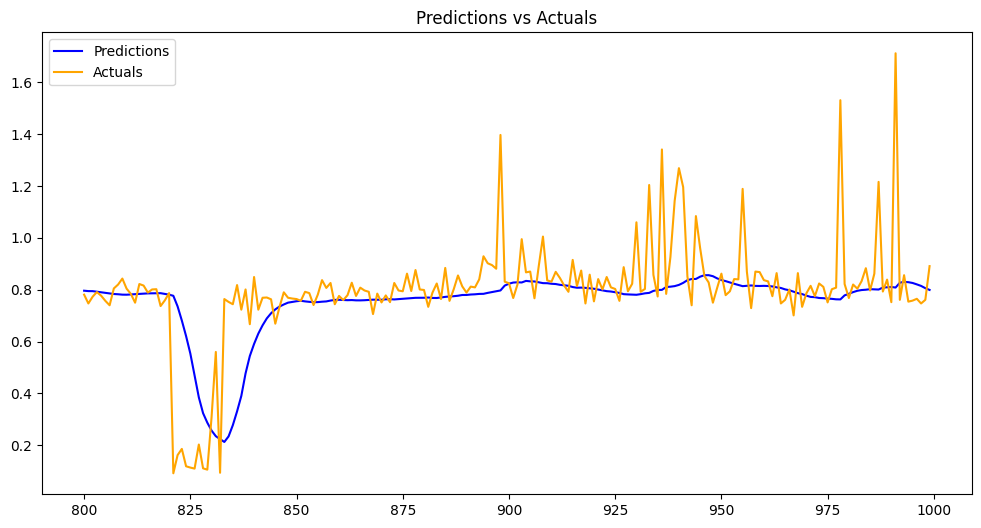

Mean Squared Error: 0.04604436678910927


In [71]:
df, error = plot_predictions(model, X_test_scaled, y_test_scaled, target_scaler, start=800, end=1000)
print("Mean Squared Error:", error)

In [1]:
# FULL CODE

In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('dataset/1724929644/dataset-90d.csv')
df.index = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%SZ')
df.drop(inplace=True, axis=1, columns=['time', 'machine'])
df_15m = df[4::15]

def df_to_X_y(df:pd.DataFrame, target_index:int, window_size=720):
    df = df.to_numpy()
    X = []
    y = []

    for index in range(len(df) - window_size):
        X.append([window for window in df[index:index + window_size]])
        y.append(df[index + window_size][target_index])
    return np.array(X), np.array(y)

target_index = list(df_15m.columns).index('axialAxisRmsVibration')
X, y = df_to_X_y(df=df_15m, target_index=target_index)


X_train, y_train = X[:6172], y[:6172]
X_val, y_val = X[6172:6672], y[6172:6672]
X_test, y_test = X[6672:], y[6672:]


# Standardizasyon

feature_scaler = StandardScaler()

# Train verisi üzerinde fit ve transform
X_train_reshaped = X_train.reshape(-1, X_train.shape[2])  # 3D -> 2D (ör: [samples * timesteps, features])
X_train_scaled = feature_scaler.fit_transform(X_train_reshaped)
X_train_scaled = X_train_scaled.reshape(X_train.shape)   # 2D -> 3D geri dönüş

# Validation ve Test verileri üzerinde sadece transform
X_val_reshaped = X_val.reshape(-1, X_val.shape[2])
X_val_scaled = feature_scaler.transform(X_val_reshaped)
X_val_scaled = X_val_scaled.reshape(X_val.shape)

X_test_reshaped = X_test.reshape(-1, X_test.shape[2])
X_test_scaled = feature_scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

# Target değişkeni için scaler
target_scaler = StandardScaler()

# Train target üzerinde fit ve transform
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))

# Validation ve Test target üzerinde sadece transform
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))


# MODEL
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(720, 6)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()

cp = ModelCheckpoint('best_model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=5, batch_size=32, callbacks=[cp])

def plot_predictions(model, X, y, target_scaler, start=0, end=500):
    # Modelin tahminlerini al
    predictions_scaled = model.predict(X).flatten()
    predictions_original = target_scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

    # Gerçek değerleri orijinal ölçeğe dönüştür
    y_original = target_scaler.inverse_transform(y.reshape(-1, 1)).flatten()

    # Tahminler ve gerçek değerler için DataFrame oluştur
    df = pd.DataFrame(data={'Predictions': predictions_original, 'Actuals': y_original})

    # Plotlama
    plt.figure(figsize=(12, 6))
    plt.plot(df['Predictions'][start:end], label='Predictions', color='blue')
    plt.plot(df['Actuals'][start:end], label='Actuals', color='orange')
    plt.legend()
    plt.title('Predictions vs Actuals')
    plt.show()
    return df, mse(y_original, predictions_original)


df, error = plot_predictions(model, X_test_scaled, y_test_scaled, target_scaler, start=800, end=1000)
print("Mean Squared Error:", error)

In [3]:
# OOP model

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from datetime import datetime
from _logger import ProjectLogger
import traceback
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler


class RNNModel:
    logger = ProjectLogger(class_name='RNNModel').create_logger()
    thresholds = {
        'axialAxisRmsVibration': 0.1,
        'radialAxisKurtosis': 3,
        'radialAxisPeakAcceleration': 0.05,
        'radialAxisRmsAcceleration': 0.01
    }

    def __init__(self):
        self.df = None
        self.input_steps = None
        self.output_steps = None
        self.start_time = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
        self.input_columns = ['axialAxisRmsVibration', 'radialAxisKurtosis', 'radialAxisPeakAcceleration', 'radialAxisRmsAcceleration', 'radialAxisRmsVibration', 'temperature', 'is_running']
        self.target_index = self.input_columns.index('axialAxisRmsVibration')


    def main(self, df:pd.DataFrame, input_days:int, output_days:int, interval_minute:int):
        self.df = df
        self.df.index = pd.to_datetime(self.df['time'], format='%Y-%m-%dT%H:%M:%SZ')
        self.df.drop(inplace=True, axis=1, columns=['time', 'machine'])
        self.input_steps = int(((input_days - output_days) * 24 * (60 / interval_minute)) * 0.9)
        self.output_steps = int(output_days * 24 * (60 / interval_minute))

        X, y = self.prepare_data(df=self.df, )


    def prepare_data(self, df:pd.DataFrame, window_size:int):
        target_index = list(df.columns).index('axialAxisRmsVibration')
        df = df.to_numpy()
        X = []
        y = []

        for index in range(len(df) - window_size):
            X.append([window for window in df[index:index + window_size]])
            y.append(df[index + window_size][target_index])
        return np.array(X), np.array(y)